In [1]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
dats = pd.read_csv('./data/data2019.csv', names=['Station', 'Parameter', 'Value', 'Unit', 'Lat', 'Lon', 'Date'], 
                   parse_dates=['Date'])

In [3]:
dats.head()

,Station,Parameter,Value,Unit,Lat,Lon,Date
0,DESL003,o3,12.67,µg/m³,49.357861,6.73354,2019-01-23 00:00:00
1,DESL003,o3,11.23,µg/m³,49.357861,6.73354,2019-01-23 01:00:00
2,DESL003,o3,10.96,µg/m³,49.357861,6.73354,2019-01-23 02:00:00
3,DESL003,o3,14.51,µg/m³,49.357861,6.73354,2019-01-23 03:00:00
4,DESL003,o3,11.72,µg/m³,49.357861,6.73354,2019-01-23 04:00:00


## Single Station

In [4]:
station_id = 'DESL003'
one_station = dats[dats.Station==station_id]

one_station = one_station[:500]
one_station.sort_values(by=['Date'], inplace=True)

/home/jj/miniconda3/envs/pandcp/lib/python3.6/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


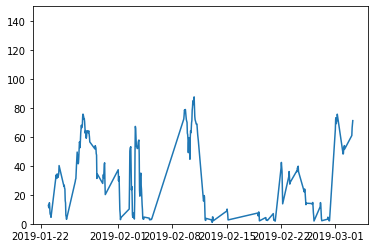

In [5]:
axes = plt.gca()
axes.set_ylim([0,150.])
#axes.xaxis.set_major_formatter(plt.NullFormatter())

plt.plot(one_station.Date, one_station.Value);

## Map

In [7]:
from mpl_toolkits.basemap import Basemap

In [6]:
grouped = dats.groupby('Station').agg({'Value': 'mean', 'Lat': 'max', 'Lon': 'max'})

/home/jj/miniconda3/envs/pandcp/lib/python3.6/site-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  
/home/jj/miniconda3/envs/pandcp/lib/python3.6/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  after removing the cwd from sys.path.


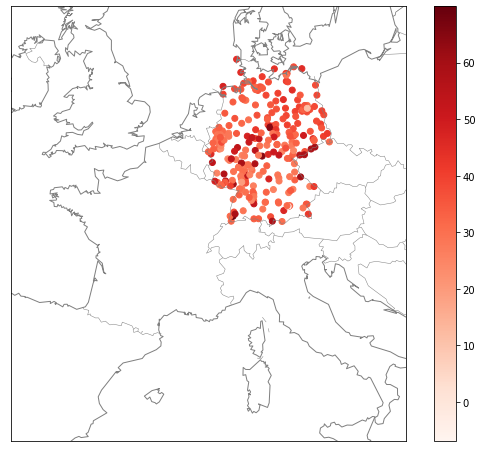

In [32]:
fig = plt.figure(figsize=(10, 8))
m = Basemap(projection='lcc', resolution='l', lat_0 = 47.477, lon_0 = 6.093, width=2E6, height=2.2E6)
m.drawcoastlines(color='gray')
m.drawcountries(color='gray')

m.scatter(grouped.Lon.values, grouped.Lat.values, latlon=True, c=grouped.Value.values, cmap='Reds')
plt.colorbar();

## 2018 vs 2019

In [45]:
data2018= pd.read_csv('./data/data2018.csv', names=['Station', 'Parameter', 'Value', 'Unit', 'Lat', 'Lon', 'Date'], 
                   parse_dates=['Date'])
data2019 = pd.read_csv('./data/data2019.csv', names=['Station', 'Parameter', 'Value', 'Unit', 'Lat', 'Lon', 'Date'], 
                   parse_dates=['Date'])

In [46]:
data2018vals = data2018.groupby('Date').agg({'Value':'count'})
data2019vals = data2019.groupby('Date').agg({'Value': 'count'})

In [47]:
d18 = data2018vals.resample('1M').sum()
d19 = data2019vals.resample('1M').sum()

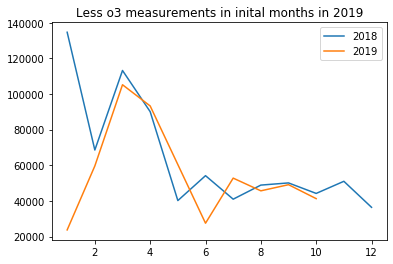

In [54]:
plt.plot(d18.index.month,d18, label='2018')
plt.plot(d19.index.month,d19, label='2019')
plt.title('Less o3 measurements in inital months in 2019')
plt.legend();